<a href="https://colab.research.google.com/github/SaulArmeaga/MA1042Test/blob/main/EjemploBDMadrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importamos las librerías necesarias 
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
#import statsmodels.formula.api as smf #Librería que proporciona formulas para estimar muchos modelos estadísticos
import numpy as np

# Cargar el dataset desde un archivo
from google.colab import drive
drive.mount('/content/drive')
df_aire = pd.read_excel('/content/drive/MyDrive/Grabaciones/1 FJ23 MA1042.601/CEU/2022_Accidentalidad.xlsx')
df_aire

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2022S000001,2022-01-01,01:30:00,"AVDA. ALBUFERA, 19",19,13,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 30 a 34 años,Mujer,NaN,NaN,443359.226,4472082.272,N,NaN
1,2022S000001,2022-01-01,01:30:00,"AVDA. ALBUFERA, 19",19,13,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 45 a 49 años,Hombre,NaN,NaN,443359.226,4472082.272,N,NaN
2,2022S000002,2022-01-01,00:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3,RETIRO,Colisión fronto-lateral,NaN,Motocicleta hasta 125cc,Conductor,De 30 a 34 años,Hombre,NaN,NaN,441155.351,4474129.588,S,NaN
3,2022S000002,2022-01-01,00:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3,RETIRO,Colisión fronto-lateral,NaN,Motocicleta hasta 125cc,Pasajero,De 35 a 39 años,Mujer,NaN,NaN,441155.351,4474129.588,N,NaN
4,2022S000002,2022-01-01,00:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3,RETIRO,Colisión fronto-lateral,NaN,Turismo,Conductor,De 40 a 44 años,Hombre,NaN,NaN,441155.351,4474129.588,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47048,2022S041289,2022-12-29,19:40:00,CALL. GENERAL RICARDOS / plaza de toros,174,11,CARABANCHEL,Alcance,Despejado,Turismo,Conductor,De 50 a 54 años,Hombre,14.0,Sin asistencia sanitaria,437453.757,4470784.586,N,NaN
47049,2022S041289,2022-12-29,19:40:00,CALL. GENERAL RICARDOS / plaza de toros,174,11,CARABANCHEL,Alcance,Despejado,Turismo,Pasajero,De 50 a 54 años,Mujer,7.0,Asistencia sanitaria sólo en el lugar del acci...,437453.757,4470784.586,N,NaN
47050,2022S041312,2022-12-12,22:50:00,AVDA. ANDALUCIA / AVDA. PERLA,14,12,USERA,Colisión fronto-lateral,Lluvia débil,Turismo,Conductor,De 21 a 24 años,Mujer,NaN,NaN,441049.284,4469136.878,N,NaN
47051,2022S041312,2022-12-12,22:50:00,AVDA. ANDALUCIA / AVDA. PERLA,14,12,USERA,Colisión fronto-lateral,Lluvia débil,Turismo,Conductor,De 35 a 39 años,Hombre,NaN,NaN,441049.284,4469136.878,N,NaN


In [ ]:
df_aire.isna().sum()

num_expediente              0
fecha                       0
hora                        0
localizacion                0
numero                      0
cod_distrito                0
distrito                    0
tipo_accidente              0
estado_meteorológico     5290
tipo_vehiculo             199
tipo_persona                0
rango_edad                  0
sexo                        0
cod_lesividad           22148
lesividad               22148
coordenada_x_utm           10
coordenada_y_utm           10
positiva_alcohol          222
positiva_droga          46913
dtype: int64

In [ ]:
df_aire['cod_lesividad'].isna().sum()

22148

In [ ]:
# Mostrar los valores nulos para este campo
df_aire['cod_lesividad'][df_aire['cod_lesividad'].isna()]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
47045   NaN
47046   NaN
47050   NaN
47051   NaN
47052   NaN
Name: cod_lesividad, Length: 22148, dtype: float64

In [ ]:
df_aire_sin_nulos = df_aire.dropna()
df_aire_sin_nulos

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
725,2022S000392,2022-01-09,04:45:00,"CALL. ALCALA, 200B",200B,4,SALAMANCA,Atropello a persona,Despejado,Turismo,Conductor,De 45 a 49 años,Hombre,14.0,Sin asistencia sanitaria,443709.208,4475761.635,N,1.0
2296,2022S001398,2022-01-22,15:10:00,CALL. ALCALA / CALL. CARDENAL BELLUGA,229,4,SALAMANCA,Colisión fronto-lateral,Despejado,Turismo,Conductor,De 25 a 29 años,Hombre,14.0,Sin asistencia sanitaria,443593.906,4475695.869,N,1.0
2380,2022S001465,2022-01-23,07:20:00,"CALL. NUESTRA SEÑORA DE LA LUZ, 53",53,10,LATINA,Choque contra obstáculo fijo,Despejado,Turismo,Conductor,De 30 a 34 años,Hombre,14.0,Sin asistencia sanitaria,436236.719,4470884.592,S,1.0
3786,2022S002306,2022-02-02,12:00:00,"AVDA. MACHUPICHU, 23",23,16,HORTALEZA,Atropello a persona,Despejado,Turismo,Conductor,De 40 a 44 años,Hombre,14.0,Sin asistencia sanitaria,446950.473,4478826.635,S,1.0
3933,2022S002380,2022-04-13,03:45:00,CALL. VILLABLANCA / AVDA. GRAN VIA DEL ESTE,70,19,VICÁLVARO,Colisión fronto-lateral,Despejado,Turismo,Conductor,De 35 a 39 años,Hombre,14.0,Sin asistencia sanitaria,449498.349,4472756.377,N,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45224,2022S040284,2022-12-18,07:00:00,AVDA. CIUDAD DE BARCELONA / 30,226,3,RETIRO,Colisión fronto-lateral,Nublado,Motocicleta hasta 125cc,Conductor,De 21 a 24 años,Hombre,2.0,Ingreso inferior o igual a 24 horas,443181.980,4472196.342,N,1.0
45982,2022S040669,2022-12-22,20:00:00,"AVDA. MIGUEL HERNANDEZ, 114",114,13,PUENTE DE VALLECAS,Atropello a persona,Despejado,Furgoneta,Conductor,De 30 a 34 años,Hombre,14.0,Sin asistencia sanitaria,444921.698,4470118.095,N,1.0
46580,2022S041003,2022-12-27,22:48:00,AVDA. OPORTO / CAMINO VIEJO,1,11,CARABANCHEL,Colisión fronto-lateral,Despejado,Turismo,Conductor,De 40 a 44 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,438231.763,4470887.424,N,1.0
46730,2022S041087,2022-12-29,10:45:00,CALL. EL BOSCO 26 / RAMON PEREZ DE AYALA,28,13,PUENTE DE VALLECAS,Atropello a persona,Nublado,Turismo,Conductor,De 70 a 74 años,Hombre,14.0,Sin asistencia sanitaria,444854.740,4472385.461,N,1.0


In [ ]:
# Consultamos los registros que tienen algún valor nulo
df_aire.drop(df_aire.dropna().index)

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2022S000001,2022-01-01,01:30:00,"AVDA. ALBUFERA, 19",19,13,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 30 a 34 años,Mujer,NaN,NaN,443359.226,4472082.272,N,NaN
1,2022S000001,2022-01-01,01:30:00,"AVDA. ALBUFERA, 19",19,13,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 45 a 49 años,Hombre,NaN,NaN,443359.226,4472082.272,N,NaN
2,2022S000002,2022-01-01,00:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3,RETIRO,Colisión fronto-lateral,NaN,Motocicleta hasta 125cc,Conductor,De 30 a 34 años,Hombre,NaN,NaN,441155.351,4474129.588,S,NaN
3,2022S000002,2022-01-01,00:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3,RETIRO,Colisión fronto-lateral,NaN,Motocicleta hasta 125cc,Pasajero,De 35 a 39 años,Mujer,NaN,NaN,441155.351,4474129.588,N,NaN
4,2022S000002,2022-01-01,00:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3,RETIRO,Colisión fronto-lateral,NaN,Turismo,Conductor,De 40 a 44 años,Hombre,NaN,NaN,441155.351,4474129.588,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47048,2022S041289,2022-12-29,19:40:00,CALL. GENERAL RICARDOS / plaza de toros,174,11,CARABANCHEL,Alcance,Despejado,Turismo,Conductor,De 50 a 54 años,Hombre,14.0,Sin asistencia sanitaria,437453.757,4470784.586,N,NaN
47049,2022S041289,2022-12-29,19:40:00,CALL. GENERAL RICARDOS / plaza de toros,174,11,CARABANCHEL,Alcance,Despejado,Turismo,Pasajero,De 50 a 54 años,Mujer,7.0,Asistencia sanitaria sólo en el lugar del acci...,437453.757,4470784.586,N,NaN
47050,2022S041312,2022-12-12,22:50:00,AVDA. ANDALUCIA / AVDA. PERLA,14,12,USERA,Colisión fronto-lateral,Lluvia débil,Turismo,Conductor,De 21 a 24 años,Mujer,NaN,NaN,441049.284,4469136.878,N,NaN
47051,2022S041312,2022-12-12,22:50:00,AVDA. ANDALUCIA / AVDA. PERLA,14,12,USERA,Colisión fronto-lateral,Lluvia débil,Turismo,Conductor,De 35 a 39 años,Hombre,NaN,NaN,441049.284,4469136.878,N,NaN


In [ ]:
columnas = df_aire.columns
columnas

Index(['num_expediente', 'fecha', 'hora', 'localizacion', 'numero',
       'cod_distrito', 'distrito', 'tipo_accidente', 'estado_meteorológico',
       'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo', 'cod_lesividad',
       'lesividad', 'coordenada_x_utm', 'coordenada_y_utm', 'positiva_alcohol',
       'positiva_droga'],
      dtype='object')

In [ ]:
conteo_sexo = df_aire['sexo'].value_counts()
print(conteo_sexo)

Hombre         28408
Mujer          13600
Desconocido     5045
Name: sexo, dtype: int64


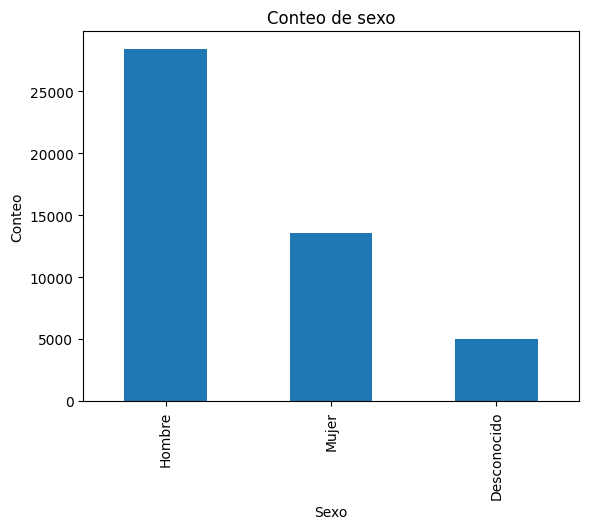

In [ ]:
conteo_sexo.plot(kind='bar')
plt.xlabel('Sexo')
plt.ylabel('Conteo')
plt.title('Conteo de sexo')
plt.show()

In [ ]:
conteo_alcohol = df_aire['positiva_alcohol'].value_counts()
print(conteo_alcohol)

N    45358
S     1473
Name: positiva_alcohol, dtype: int64


In [ ]:
df_aire['lesividad'] = df_aire['lesividad'].fillna("Sin información")
df_aire

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2022S000001,2022-01-01,01:30:00,"AVDA. ALBUFERA, 19",19,13,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 30 a 34 años,Mujer,NaN,Sin información,443359.226,4472082.272,N,NaN
1,2022S000001,2022-01-01,01:30:00,"AVDA. ALBUFERA, 19",19,13,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 45 a 49 años,Hombre,NaN,Sin información,443359.226,4472082.272,N,NaN
2,2022S000002,2022-01-01,00:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3,RETIRO,Colisión fronto-lateral,NaN,Motocicleta hasta 125cc,Conductor,De 30 a 34 años,Hombre,NaN,Sin información,441155.351,4474129.588,S,NaN
3,2022S000002,2022-01-01,00:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3,RETIRO,Colisión fronto-lateral,NaN,Motocicleta hasta 125cc,Pasajero,De 35 a 39 años,Mujer,NaN,Sin información,441155.351,4474129.588,N,NaN
4,2022S000002,2022-01-01,00:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3,RETIRO,Colisión fronto-lateral,NaN,Turismo,Conductor,De 40 a 44 años,Hombre,NaN,Sin información,441155.351,4474129.588,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47048,2022S041289,2022-12-29,19:40:00,CALL. GENERAL RICARDOS / plaza de toros,174,11,CARABANCHEL,Alcance,Despejado,Turismo,Conductor,De 50 a 54 años,Hombre,14.0,Sin asistencia sanitaria,437453.757,4470784.586,N,NaN
47049,2022S041289,2022-12-29,19:40:00,CALL. GENERAL RICARDOS / plaza de toros,174,11,CARABANCHEL,Alcance,Despejado,Turismo,Pasajero,De 50 a 54 años,Mujer,7.0,Asistencia sanitaria sólo en el lugar del acci...,437453.757,4470784.586,N,NaN
47050,2022S041312,2022-12-12,22:50:00,AVDA. ANDALUCIA / AVDA. PERLA,14,12,USERA,Colisión fronto-lateral,Lluvia débil,Turismo,Conductor,De 21 a 24 años,Mujer,NaN,Sin información,441049.284,4469136.878,N,NaN
47051,2022S041312,2022-12-12,22:50:00,AVDA. ANDALUCIA / AVDA. PERLA,14,12,USERA,Colisión fronto-lateral,Lluvia débil,Turismo,Conductor,De 35 a 39 años,Hombre,NaN,Sin información,441049.284,4469136.878,N,NaN


In [ ]:
df_aire['sexo'] = df_aire['sexo'].replace('Desconocido', 'Sin información')

In [ ]:
conteo_sexo = df_aire['sexo'].value_counts()
print(conteo_sexo)

Hombre             28408
Mujer              13600
Sin información     5045
Name: sexo, dtype: int64


In [ ]:
print(df_aire['cod_distrito'].mean(axis=0))

9.896435933946826


In [ ]:
print(df_aire['cod_distrito'].median(axis=0))

10.0


In [ ]:
print(df_aire['cod_distrito'].std(axis=0))

5.6429216043924395


In [ ]:
max = df_aire['cod_distrito'].max(axis=0)
min = df_aire['cod_distrito'].min(axis=0)
rango = max-min
print(rango)

20


In [ ]:
df_aire_cod_lesi_sin_nulos = df_aire['cod_lesividad'].dropna()
#df_aire_cod_lesi_sin_nulos.mean()
print(df_aire['cod_lesividad'].std(axis=0))
#print(df_aire_numero_sin_nulos['numero'].mean(axis=0).dropna())

4.760959505811288
